In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import LinearSVR
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from datetime import date

In [2]:
# Get the quarterly financial metrics for Ebay
metricDataRaw = []
with open('All Datasets/AegionData/aegion_metrics.txt') as metric_file:
    for line in metric_file:
        metricDataRaw.append(line.replace('\n', ''))
    
metrics = {}
metrics['quarter'] = metricDataRaw[0].split(',')[1:]
for entry in [1, 3, 5, 7, 9, 11]:
    tempData = metricDataRaw[entry+1].split(',')
    metrics[metricDataRaw[entry]] = tempData[1:]
    

In [3]:
# Get the daily stock prices for Ebay
stock_prices = {'elapsed': [], 'open': [], 'high': [], 'low': [], 'close': [], 'volume': []}
X = []
y = []
firstDate = 'now'
with open('All Datasets/AegionData/aegion_stock_prices.txt') as stock_price_file:
    for line in stock_price_file:
        tempLine = line.split(',')
        if firstDate == 'now':
            rawDate = tempLine[0].split('-')
            firstDate = date(int(rawDate[0]), int(rawDate[1]), int(rawDate[2]))
        tempRawDate = tempLine[0].split('-')
        tempDate = date(int(tempRawDate[0]), int(tempRawDate[1]), int(tempRawDate[2]))
        dayofweek = tempDate.weekday()
        month = tempDate.month
        year = tempDate.year
        delta = tempDate - firstDate
        
        stock_prices['elapsed'].append(delta.days)
        stock_prices['open'].append(float(tempLine[1]))
        stock_prices['high'].append(float(tempLine[2]))
        stock_prices['low'].append(float(tempLine[3]))
        stock_prices['close'].append(float(tempLine[4]))
        stock_prices['volume'].append(int(tempLine[5]))
        
        if month in [1, 2, 3]:
            indStr = str(year)+'Q1'
            ind = metrics['quarter'].index(indStr)
            revenue = float(metrics['revenue'][ind])
            prop_value = float(metrics['property_value'][ind])
            operating_expenses = float(metrics['operating_expenses'][ind])
            assets = float(metrics['assets'][ind])
            liabilities = float(metrics['liabilities'][ind])
            cash = float(metrics['cash'][ind])
            
            X.append([delta.days, dayofweek, month, revenue, prop_value, operating_expenses, assets, liabilities, cash])
            
        if month in [4, 5, 6]:
            indStr = str(year)+'Q2'
            ind = metrics['quarter'].index(indStr)
            revenue = float(metrics['revenue'][ind])
            prop_value = float(metrics['property_value'][ind])
            operating_expenses = float(metrics['operating_expenses'][ind])
            assets = float(metrics['assets'][ind])
            liabilities = float(metrics['liabilities'][ind])
            cash = float(metrics['cash'][ind])
            
            X.append([delta.days, dayofweek, month, revenue, prop_value, operating_expenses, assets, liabilities, cash])
            
        if month in [7, 8, 9]:
            indStr = str(year)+'Q3'
            ind = metrics['quarter'].index(indStr)
            revenue = float(metrics['revenue'][ind])
            prop_value = float(metrics['property_value'][ind])
            operating_expenses = float(metrics['operating_expenses'][ind])
            assets = float(metrics['assets'][ind])
            liabilities = float(metrics['liabilities'][ind])
            cash = float(metrics['cash'][ind])
            
            X.append([delta.days, dayofweek, month, revenue, prop_value, operating_expenses, assets, liabilities, cash])
            
        if month in [10, 11, 12]:
            indStr = str(year)+'Q4'
            ind = metrics['quarter'].index(indStr)
            revenue = float(metrics['revenue'][ind])
            prop_value = float(metrics['property_value'][ind])
            operating_expenses = float(metrics['operating_expenses'][ind])
            assets = float(metrics['assets'][ind])
            liabilities = float(metrics['liabilities'][ind])
            cash = float(metrics['cash'][ind])
            
            X.append([delta.days, dayofweek, month, revenue, prop_value, operating_expenses, assets, liabilities, cash])
            
        
            
        y.append([float(tempLine[4])])

In [4]:
# Generate test and train data based on close price
n = len(stock_prices['close'])
split = int(n*0.8)
train_X = X[:split]
train_y = y[:split]
test_X = X[split:]
test_y = y[split:]

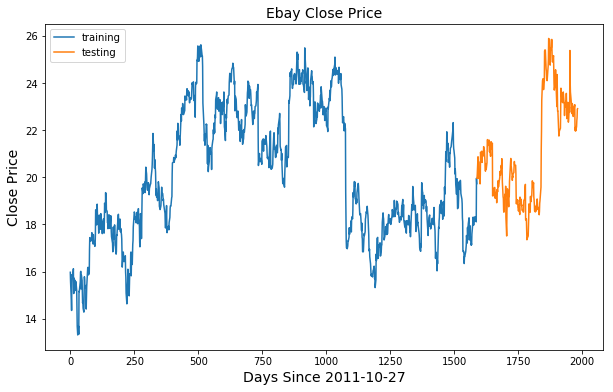

In [5]:
# Plot the close price of the stock
fig, ax = plt.subplots()
fig.set_size_inches(10, 6, forward=True)

#Plot the training data
plt.plot(stock_prices['elapsed'][:split], stock_prices['close'][:split], label='training')

#Plot the testing data
plt.plot(stock_prices['elapsed'][split:], stock_prices['close'][split:], label='testing')

ax.set_title("Ebay Close Price", fontsize=14)
ax.set_xlabel("Days Since "+str(firstDate), fontsize=14)
ax.set_ylabel("Close Price", fontsize=14)
ax.legend()
plt.show()

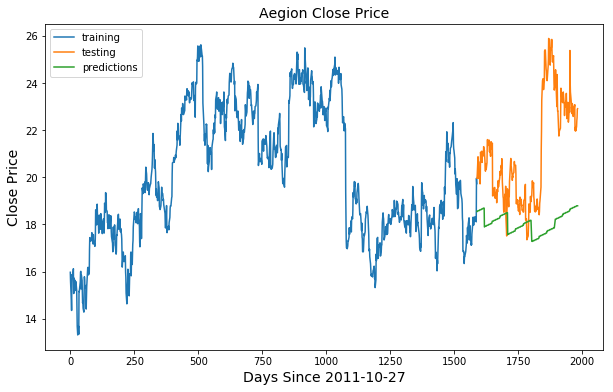

In [7]:
# Train a linear model on first 80% of data
linear_model = LinearRegression()
linear_model.fit(train_X, train_y)
tempPreds = linear_model.predict(test_X)
preds = []
for pred in tempPreds:
    preds.append(pred[0])

### Plot predicted stock close price for test data
fig, ax = plt.subplots()
fig.set_size_inches(10, 6, forward=True)

#Plot the training data
plt.plot(stock_prices['elapsed'][:split], stock_prices['close'][:split], label='training')

#Plot the testing data
plt.plot(stock_prices['elapsed'][split:], stock_prices['close'][split:], label='testing')

#Plot our prediction
plt.plot(stock_prices['elapsed'][split:], preds, label='predictions')

ax.set_title("Aegion Close Price", fontsize=14)
ax.set_xlabel("Days Since "+str(firstDate), fontsize=14)
ax.set_ylabel("Close Price", fontsize=14)
ax.legend()
plt.show()

c:\users\michael voecks\appdata\local\programs\python\python35-32\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


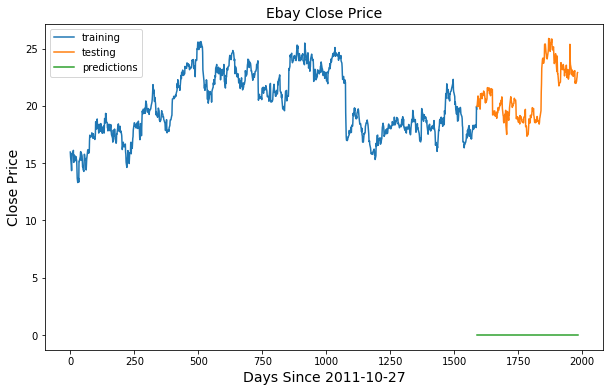

In [30]:
# Train an SVR model on the first 80% of the data
train_y = np.reshape(train_y, (split, ))
svr_model = LinearSVR(max_iter=10000)
svr_model.fit(train_X, train_y)
preds = svr_model.predict(test_X)

'''
train_y = np.reshape(train_y, (split, ))
test_y = np.reshape(test_y, (n-split, ))
for c in np.linspace(0.1, 0.5, 10):
    svr_model = LinearSVR(max_iter=10000, C=c)
    svr_model.fit(train_X, train_y)
    preds = svr_model.predict(test_X)
    mse = mean_squared_error(test_y, preds)
    print("C: "+str(c)+"\t MSE="+str(mse))
'''


### Plot predicted stock close price for test data
fig, ax = plt.subplots()
fig.set_size_inches(10, 6, forward=True)

#Plot the training data
plt.plot(stock_prices['elapsed'][:split], stock_prices['close'][:split], label='training')

#Plot the testing data
plt.plot(stock_prices['elapsed'][split:], stock_prices['close'][split:], label='testing')

#Plot our prediction
plt.plot(stock_prices['elapsed'][split:], preds, label='predictions')

ax.set_title("Ebay Close Price", fontsize=14)
ax.set_xlabel("Days Since "+str(firstDate), fontsize=14)
ax.set_ylabel("Close Price", fontsize=14)
ax.legend()
plt.show()

In [31]:
pca = PCA()
pca.fit(X)
print(pca.singular_values_)

[3.85364447e+09 1.64538055e+09 9.44196244e+08 5.98732345e+08
 5.09634706e+08 1.10358575e+08 8.29185118e+03 1.05864410e+02
 5.16958563e+01]
